In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
from itertools import combinations
import time
from sklearn.cluster import MeanShift, AgglomerativeClustering, KMeans
import seaborn as sns

# Import data + Pre-processing

In [2]:
start = time.process_time()
data = 'city_UrbanAtlas_l1_ratios.csv'
df = pd.read_csv(data)
df = df.fillna(0)
df = df.rename(columns={"Unnamed: 2": "No Class"})
df = df[df['No Class']<0.5]
X = df.copy()
y = df['cc_name']
X.drop(['cc_code_short', 'cc_name', 'No Class'], axis=1, inplace=True)
print("Reading data + Pre-processing time: ", time.process_time() - start)

Reading data + Pre-processing time:  0.008436307999999837


# K-Means

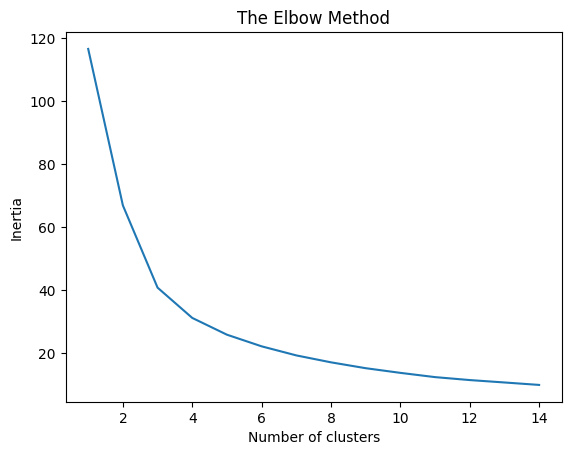

Elbow Method Time:  1.4437578819999999


In [3]:
start = time.process_time()
cs = []
max = 15
for i in range(1, max):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, max), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()
print("Elbow Method Time: ", time.process_time() - start)

K-Means Time:  0.09537749500000059


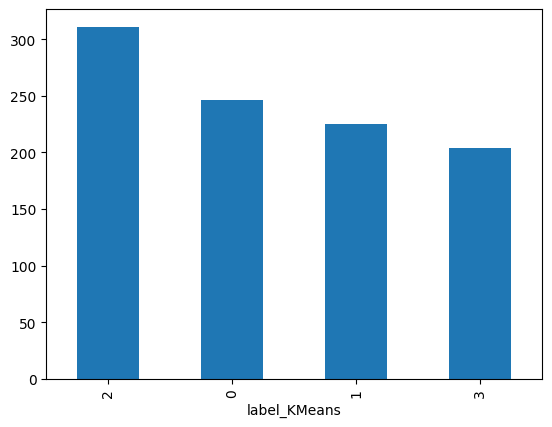

In [4]:
start = time.process_time()
k = 4
kmeans = KMeans(n_clusters = k, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
kmeans.fit(X)
df['label_KMeans'] = kmeans.labels_
fig, ax = plt.subplots()
df['label_KMeans'].value_counts().plot(ax=ax, kind='bar')
print("K-Means Time: ", time.process_time() - start)

# MeanShift

MeanShift Time:  7.6822345069999995


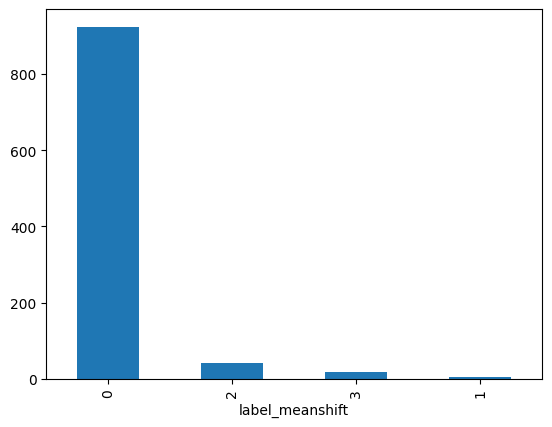

In [5]:
start = time.process_time()
meanshift = MeanShift(bandwidth=0.25).fit(X)
df['label_meanshift'] = meanshift.labels_
fig, ax = plt.subplots()
df['label_meanshift'].value_counts().plot(ax=ax, kind='bar')
print("MeanShift Time: ", time.process_time() - start)

# Agglomerative Hierarchical Clustering

AgglomerativeClustering(n_clusters=4)
AHC Time:  0.0699801640000004


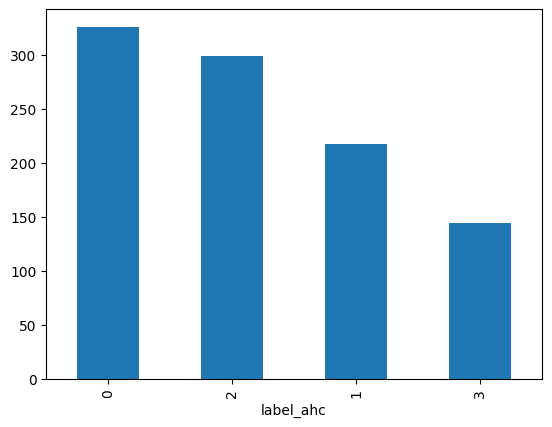

In [6]:
start = time.process_time()
ahc = AgglomerativeClustering(n_clusters=4).fit(X)
df['label_ahc'] = ahc.labels_
print(ahc)
fig, ax = plt.subplots()
df['label_ahc'].value_counts().plot(ax=ax, kind='bar')
print("AHC Time: ", time.process_time() - start)

# Plotting function

In [7]:
def plotting(label, v):
    features = [*range(3, len(X.columns)+v)]
    pairs = list(combinations(features, 2))
    columns= df.columns.values.tolist()
    for j in pairs:
        fig, ax = plt.subplots()
        ax = sns.scatterplot(x=columns[j[0]],y=columns[j[1]],hue = label, data = df,legend='full',
                             palette = {0:'red',1:'orange',2:'yellow',3:'green'})
        plt.xlabel(columns[j[0]])
        plt.ylabel(columns[j[1]])
        plt.show()    

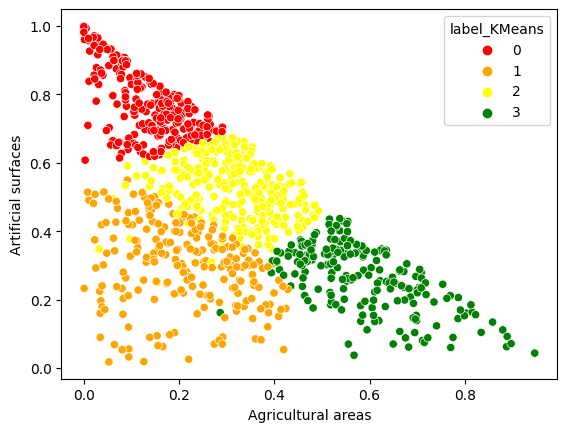

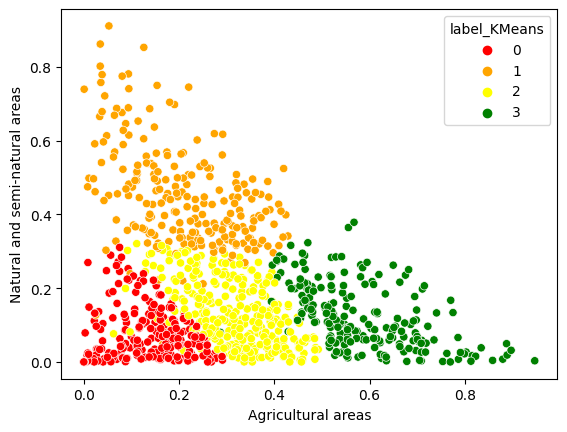

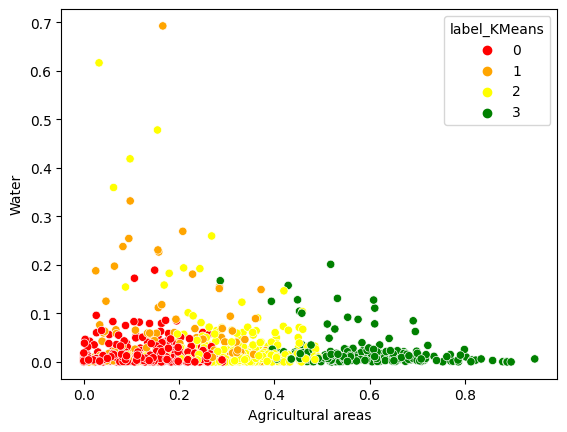

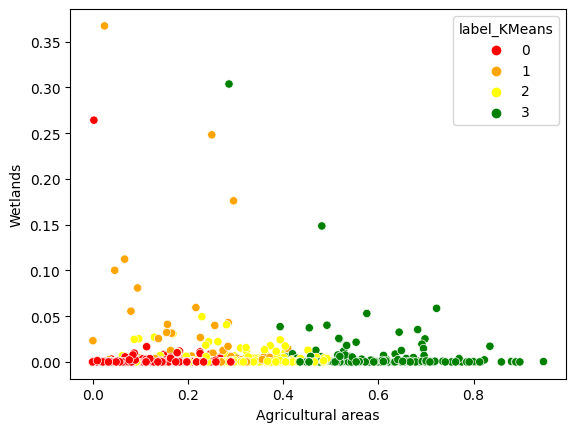

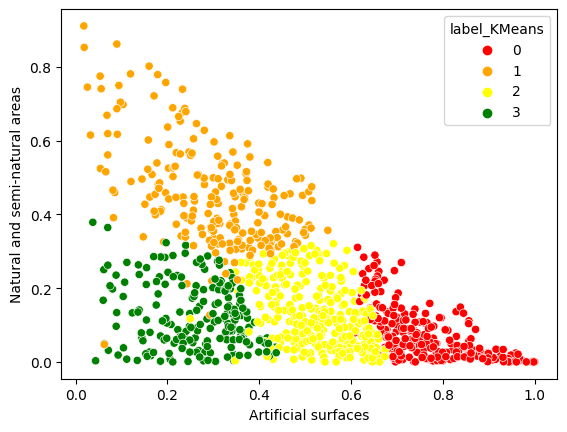

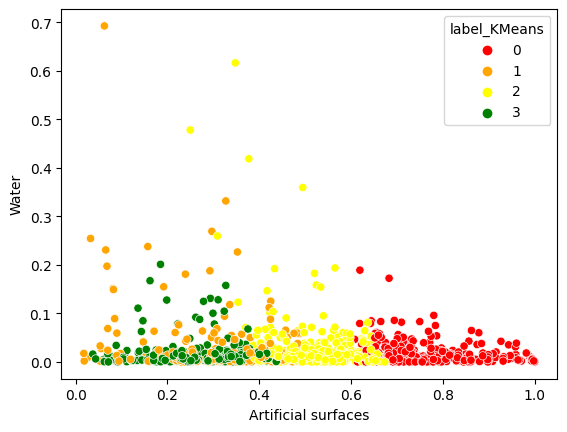

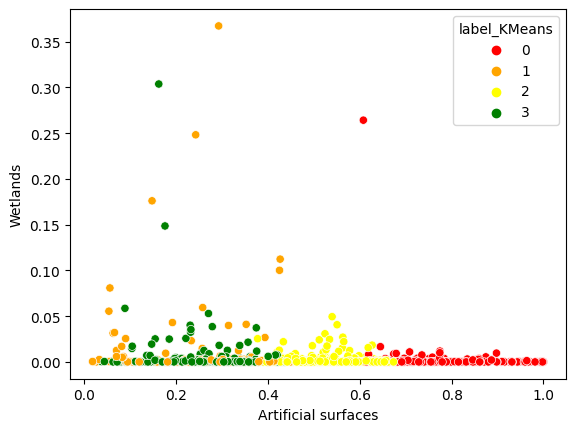

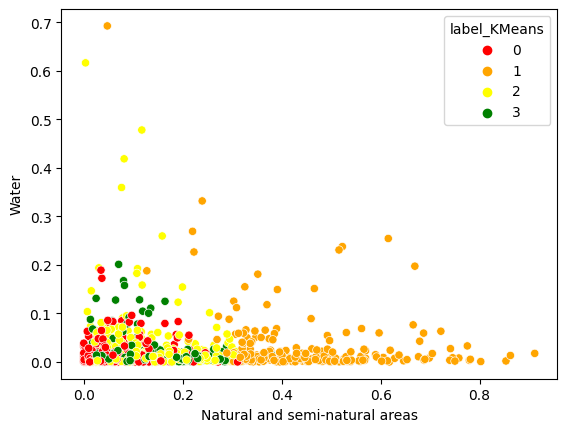

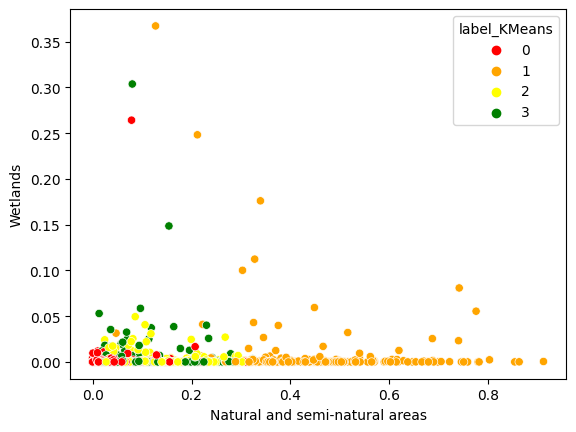

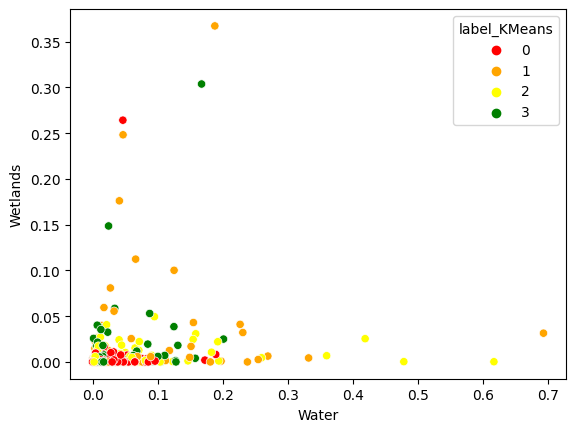

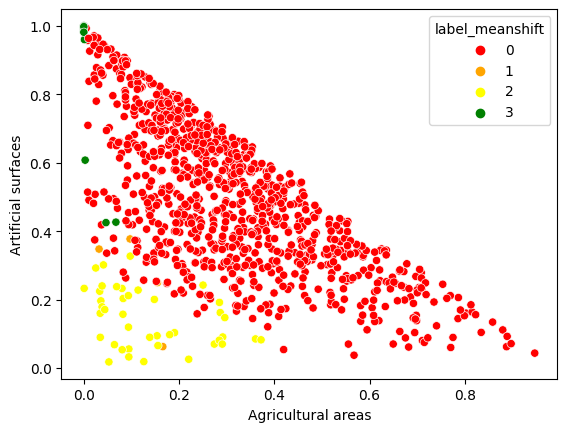

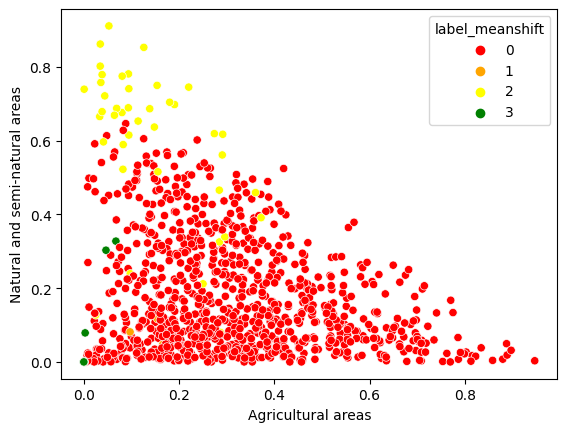

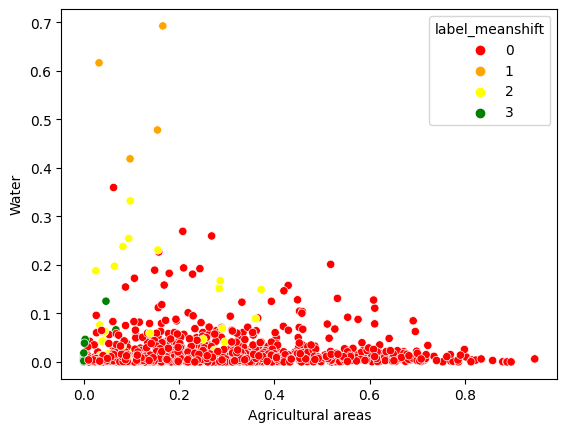

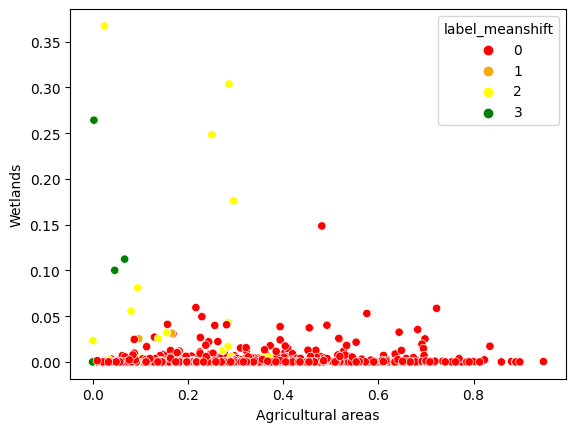

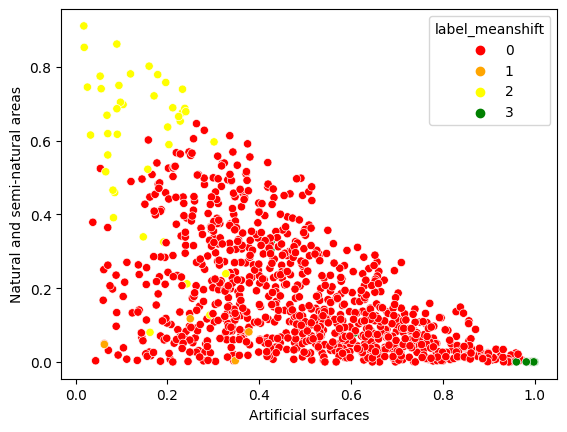

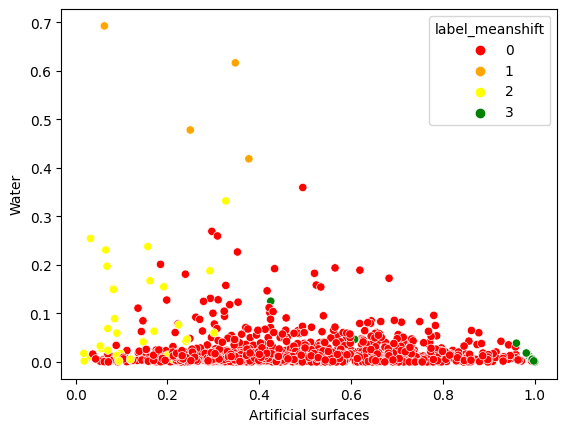

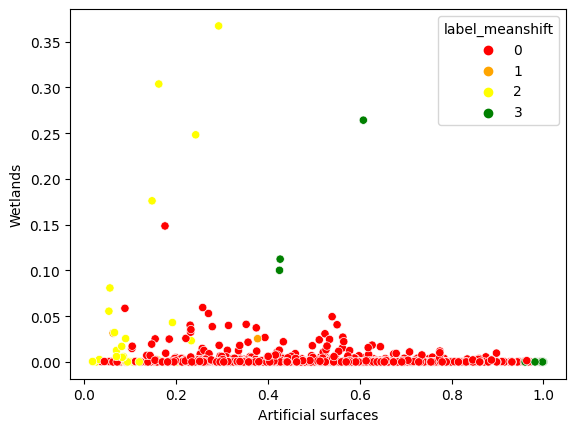

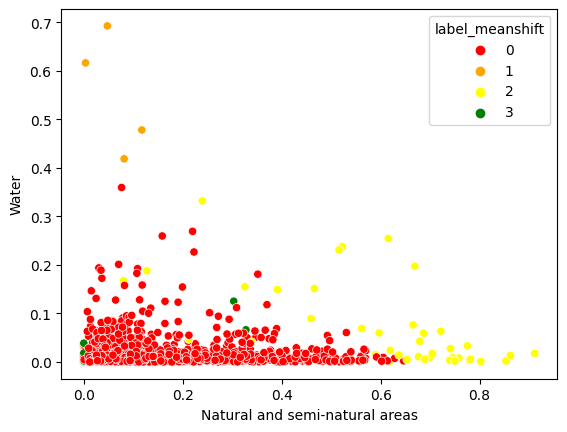

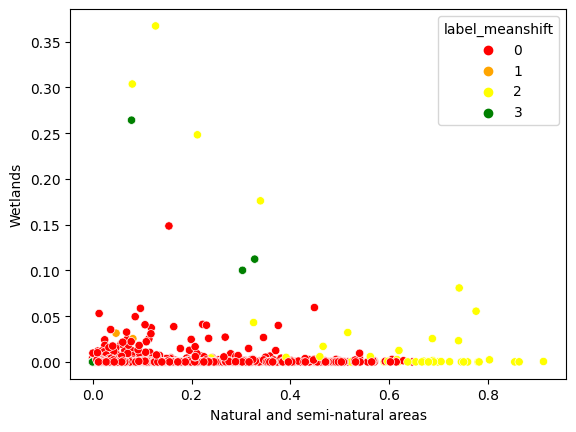

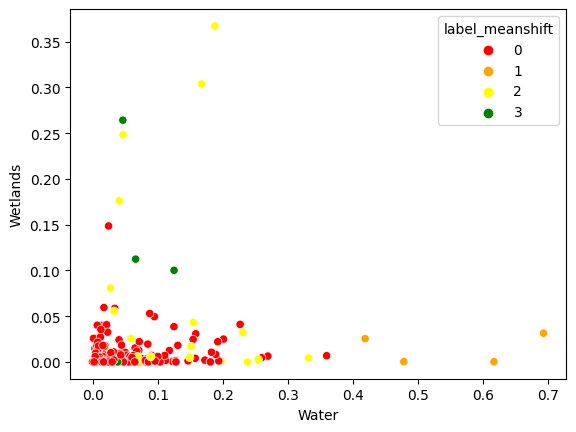

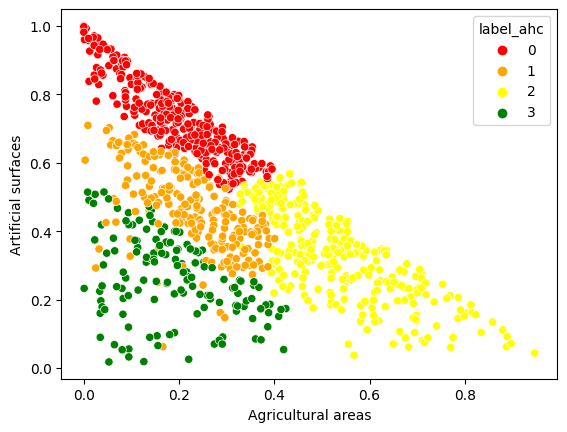

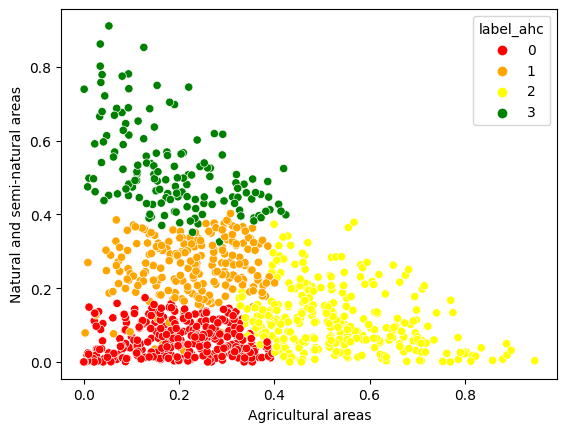

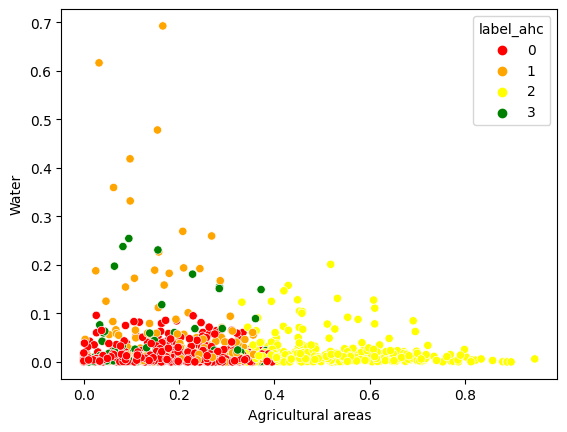

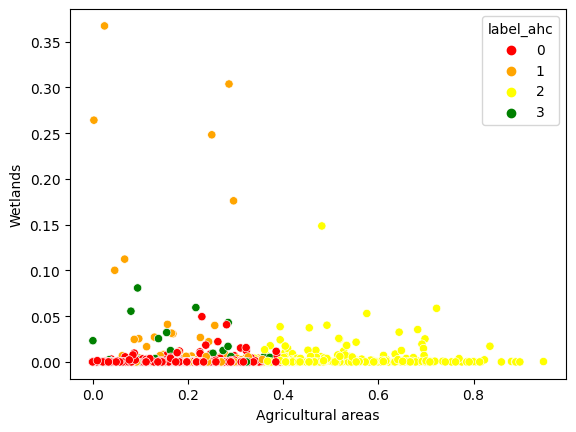

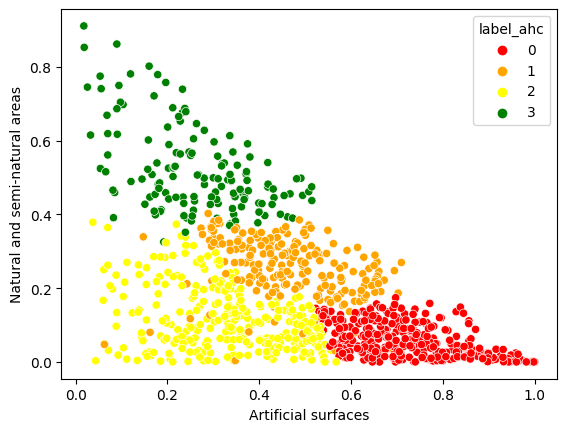

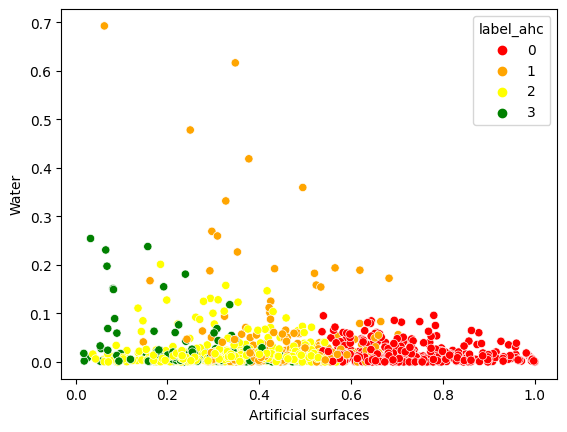

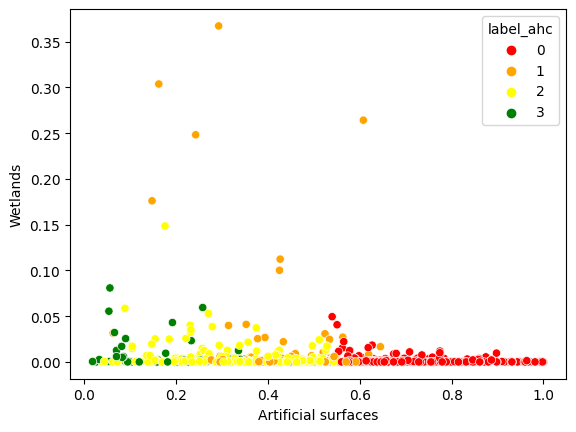

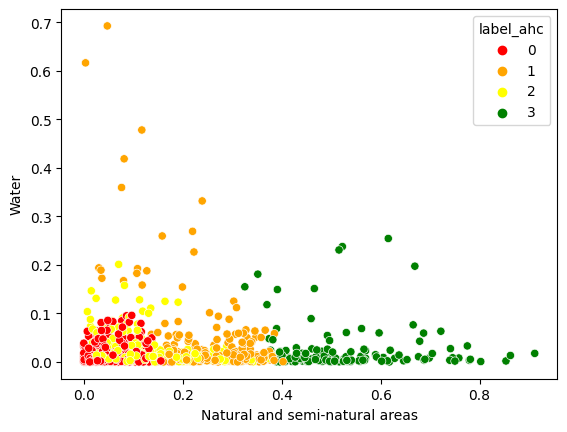

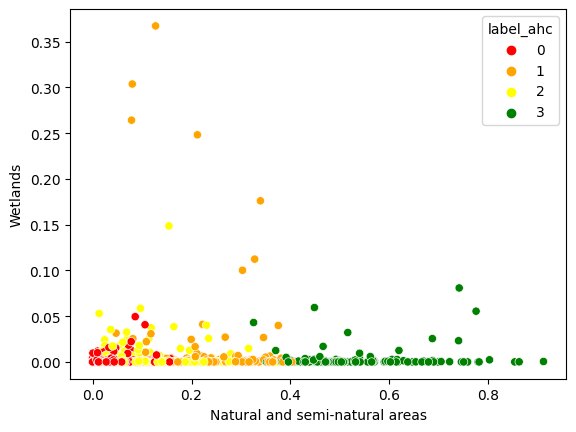

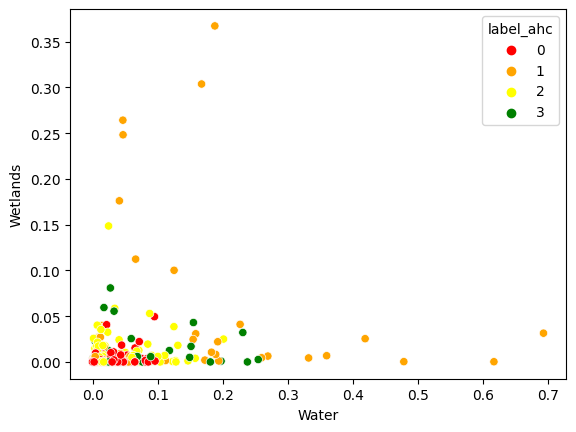

Plotting Time:  12.256842741999998


In [8]:
start = time.process_time()
plotting('label_KMeans', 3)
plotting('label_meanshift', 3)
plotting('label_ahc', 3)
print("Plotting Time: ", time.process_time() - start)

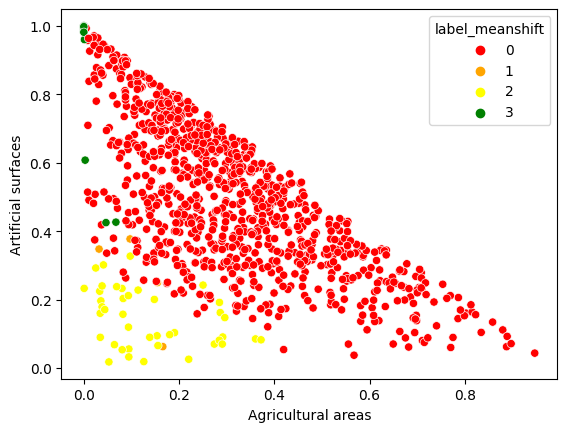

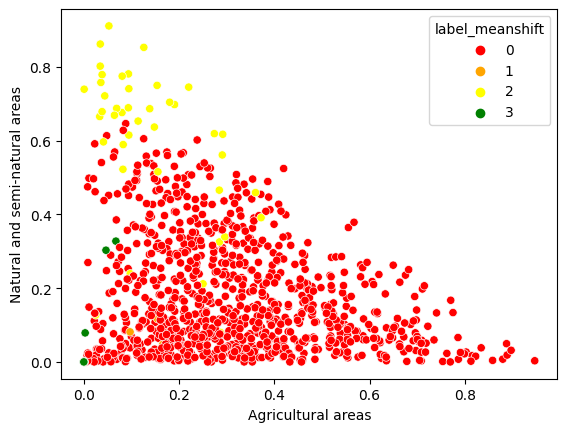

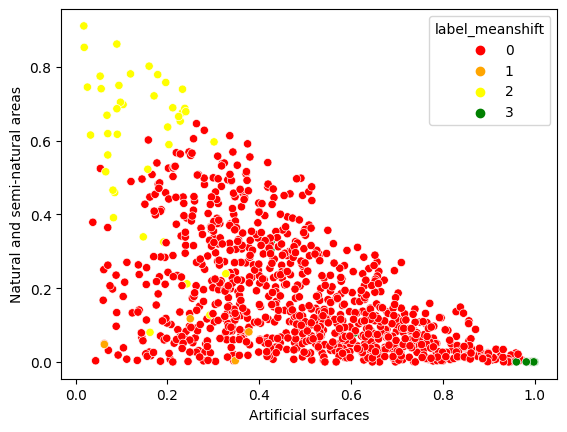

In [8]:
plotting('label_meanshift', 1)

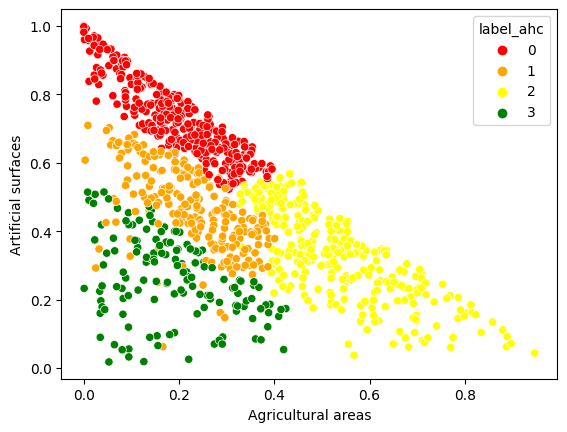

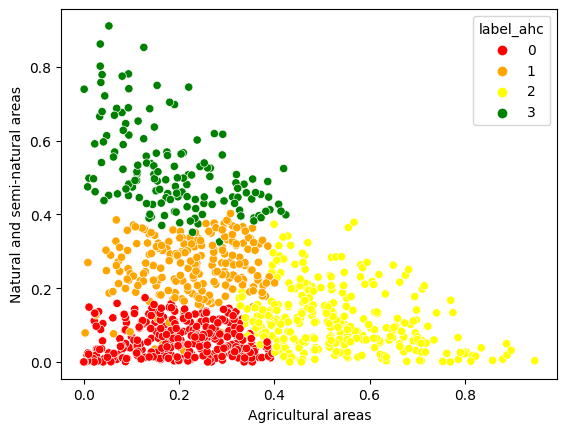

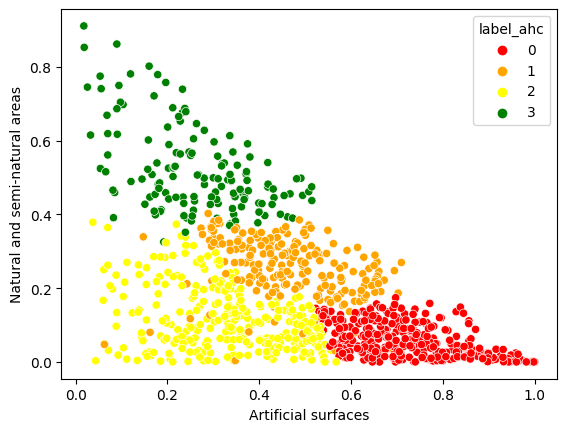

In [9]:
plotting('label_ahc', 1)